In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-review/Movie_Review.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [4]:
data = pd.read_csv('/kaggle/input/movie-review/Movie_Review.csv')

In [7]:
data.dropna(inplace=True) # This will modify 'data' directly

#dropna is a method to remove NAN values from dataframe

In [6]:
data.head()

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos


In [8]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [9]:
data['text'] = data['text'].apply(clean_review)

In [13]:

from wordcloud import WordCloud

In [15]:
reviews = ' '.join(word for word in data['text'][data['sentiment']=='neg'].astype(str))

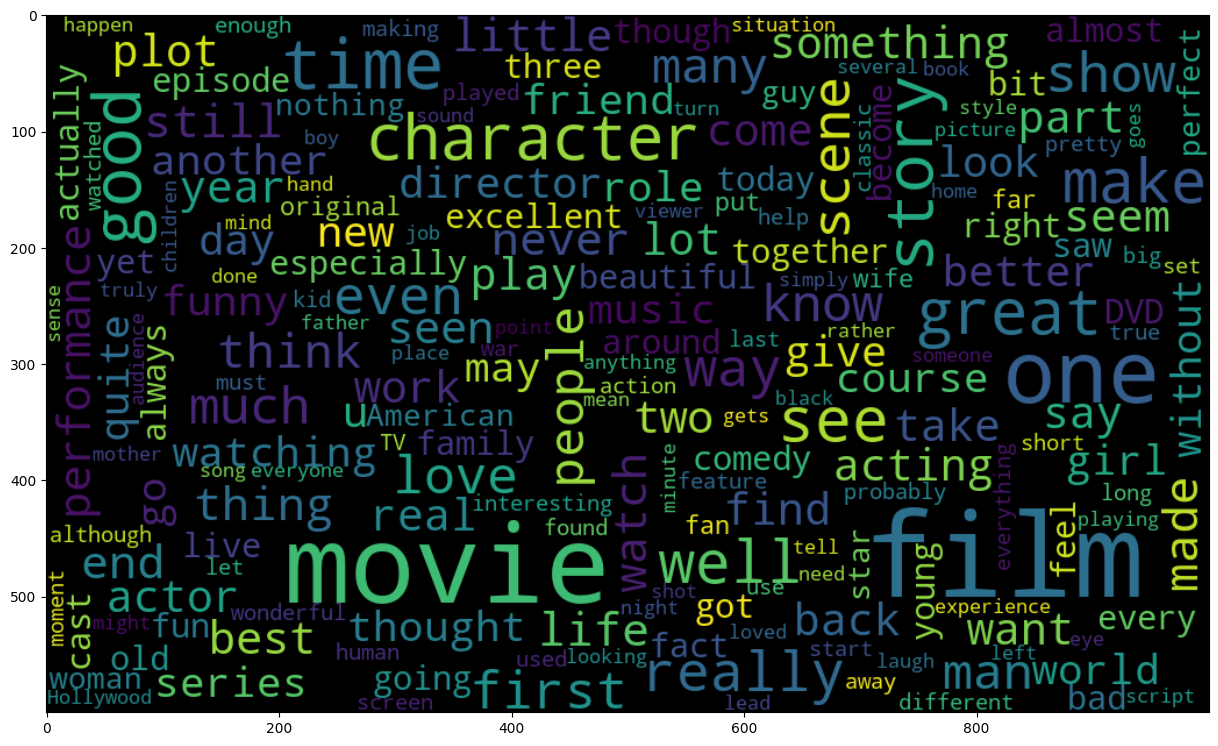

In [20]:
wordcloud = WordCloud(height = 600,width=1000,max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('on')
plt.show()

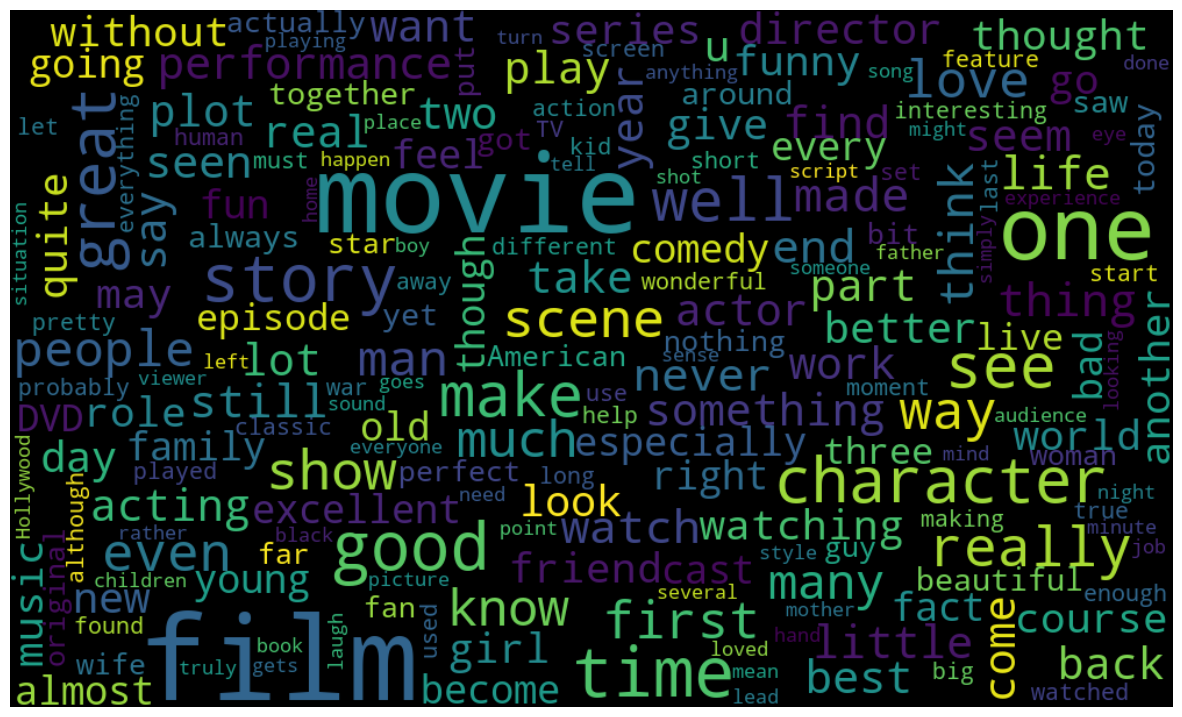

In [19]:
reviews = ' '.join(word for word in data['text'][data['sentiment']=='pos'].astype(str))
wordcloud = WordCloud(height = 600,width=1000,max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [25]:
reviews = cv.fit_transform(data['text']).toarray()

In [ ]:
data['sentiment']=da